<center><h1>Global Terrorism Database</h1></center>
### Augie Doebling, Winter 2017
### GitHub: AugieDoebling

![cool pic of world](locations.png "Locations of Attacks")

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from altair import *
from IPython.display import Image, display
import gmaps

In [2]:
data = pd.read_pickle('/data/augiedoebling/pickledGTD')

***
# Dataset
The dataset I used in this project is the Global Terrorism Database hosted by Kaggle. This dataset has 156,000 rows and I am using 36 columns for this project.

In [3]:
data.head()

,id,date,country,region,region_code,city,lat,long,summary,PERS,...,fatalitiesus,wounded,woundedus,propdamage,propvalue,hostkid,international,related,inUS_yes,byUScit_yes
0,197000000001,1970-01-01,Dominican Republic,Central America & Caribbean,2,Santo Domingo,18.456792,-69.951164,NaN,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,0
1,197000000002,1970-01-01,Mexico,North America,1,Mexico city,19.432608,-99.133207,NaN,1,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,0,0
2,197001000001,1970-01-01,Philippines,Southeast Asia,5,Unknown,15.478598,120.599741,NaN,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0,1
3,197001000002,1970-01-01,Greece,Western Europe,8,Athens,37.983773,23.728157,NaN,1,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,0,1
4,197001000003,1970-01-01,Japan,East Asia,4,Fukouka,33.580412,130.396361,NaN,1,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,0,1


***
# Why I Chose this Dataset
Originally, I wanted to do something in relation to President Trump's recent immigration ban and postion towards Muslim Americans. I looked for a dataset focusing on terrorism and nationalities. While this dataset does include nationalities, it is very complicated.

***
# Visualizations
Some interesting graphs I made from this dataset using Altair. 

### Attacks over Time

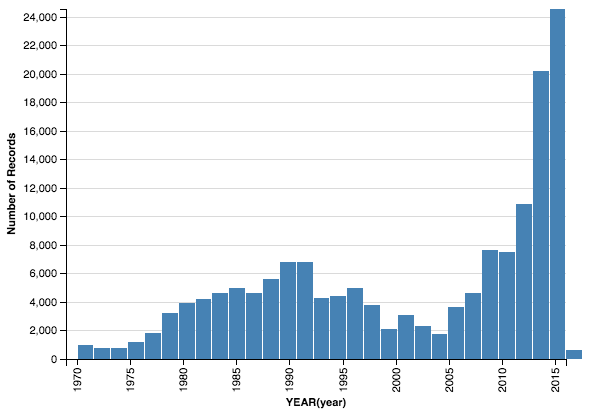

In [4]:
# years = pd.DataFrame()
# years['year'] = data['date']
# Chart(years).mark_bar().encode(
#     X("year:T", timeUnit='year', bin=Bin(maxbins=46)),
#     Y('count(*)')
# )
display(Image(filename="datedist.png"), embed=True)

### Locations

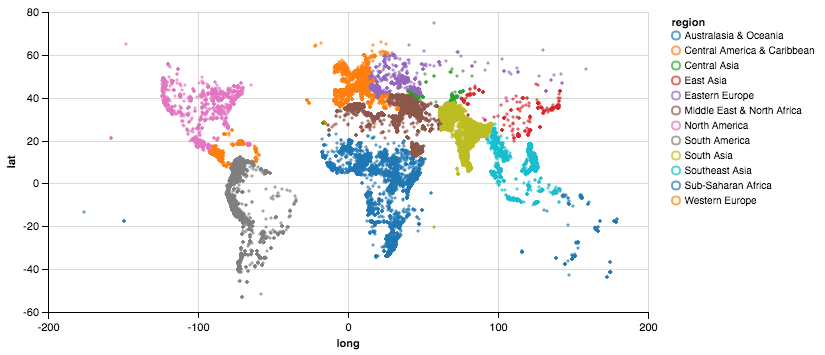

In [5]:
# loc = pd.DataFrame()
# loc['lat'] = data['lat']
# loc['long'] = data['long']
# loc['region'] = data['region']

# Chart(loc, width=600, height=300).mark_point(size=1).encode(
#     X("long"),
#     Y('lat'),
#     Color('region:N'),
# )
display(Image(filename="locationscolored.png"), embed=True)

### Countries with Highest Number of Attacks

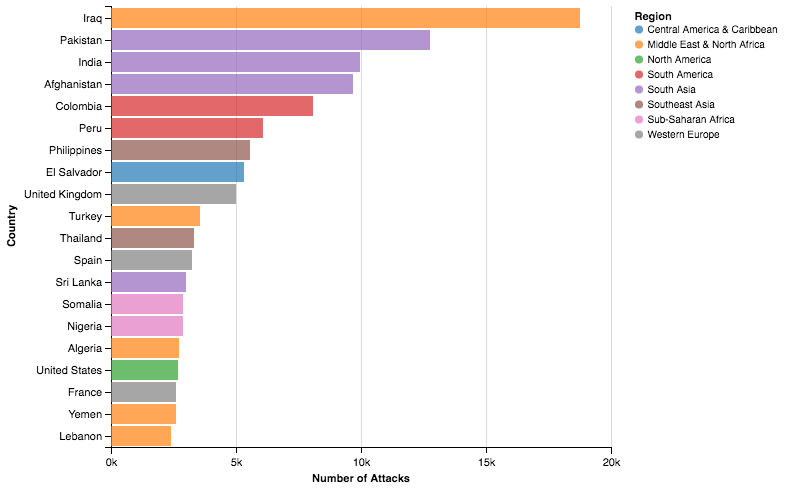

In [6]:
# vals = data.country.value_counts()[0:20]

# regions = data[['country', 'region']]
# regions = regions.drop_duplicates(subset='country')

# bycountry = pd.DataFrame()
# bycountry['country'] = vals.keys()
# bycountry['attackcount'] = vals.values

# attackcounts = pd.merge(regions, bycountry, on='country')

# Chart(attackcounts).mark_bar().encode(
#     X('attackcount:Q', title="Number of Attacks"),
#     Y('country:N', sort=SortField(field='attackcount', order='descending', op = 'max'), title="Country"),
#     Color('region:N', title="Region")
# )
display(Image(filename="topcountries.png"), embed=True)

***
# Modeling
Can anything be predicted in the dataset?

### Predicting Fatality Count

Can we predict the number of fatalities for a given attack?

I used several models and Lasso gave the best results.

Train r2: __0.0433__ Test r2: __0.1225__

This model is clearly no where near significant, and after trying several models, I switched the target.

### Predicting Region of Attack

Can we predict the region of the world the attack took place in?

I used several different models and parameters and SGDClassifier worked best.

Test accuracy score: __0.3487__ 

This model actually does not do that poorly. Random guessing would give us 0.0833, so 0.3487 is significant results.

### Conclusion

The results we found from predicting region of attack are significant, but it is obviously far from perfect since we can only predict accurately one third of the time.

***
# Challenge Area

My main challenge area was using a library called GMap. It allows for interactive maps within Jupyter notebooks. I wanted to include serveral of these maps in my project, however they take around an hour to render a small amount of data and so I have included one screenshot. 

### Interactive Google Map of Attacks where a US National was Involved

![even cooler pic of world](uscitattackmap.png "Locations of Attacks where a US National was Involved.")